In [1]:
from tools import *
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.
W0810 07:22:55.676917 140517437036352 deprecation_wrapper.py:119] From /opt/conda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 07:22:55.697352 140517437036352 deprecation_wrapper.py:119] From /opt/conda/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



In [2]:
boxes,names=read_boxes('Txt_results/boxes.txt')
features,_=read_boxes('Txt_results/features.txt',n=3)
# boxes=np.array(boxes[0]).astype(float)
# features=np.array(features[0]).astype(float)
names=np.array(names)

In [3]:
def detectVideoCrowd(video,allBoxes,allFeatures,allnames):
    res_video=[]
    for i in range(len(allBoxes)):
        features,boxes=allFeatures[i],allBoxes[i]
        boxes=np.array(boxes).astype(float)
        features=np.array(features).astype(float)
        names=np.array(allnames[i])
        crowd=cluster_crowd(features[names=='person'],boxes[names=='person'],2,eps=0.9)
        res=visualize(D.data[i].copy(),crowd,vis=False)
        res_video.append(res)
    return res_video

In [4]:
# video=detectVideoCrowd(D.data,boxes,features,names)
# print (len(video))

**Detecting Occupied Chairs**

In [11]:
D=Data({'source': "rb.mp4",'step':10,'size':(416,416,3),'video':1})

In [15]:
print (len(D.data))
print (names[0])

49
['person', 'person']


In [13]:
visualize(D.data[0],boxes[0],names[0])

ValueError: Length of passed values is 2, index implies 1

In [15]:
def normalize(boxes):
    return boxes-np.mean(bo)
def occupied(boxes,names,eps=0.05):
    ch_idx=np.where(names=='chair')[0]
    per_idx=np.where(names=='person')[0]
    height=np.abs(boxes[per_idx][:,0]-boxes[per_idx][:,2])
    print (height)
    iou_=iou(boxes[ch_idx],boxes[per_idx])
    Mask=np.zeros_like(iou_,dtype=bool)
    Mask[np.argmax(iou_,axis=0),np.arange(Mask.shape[1],dtype=int)]=True
#     iou_[Mask]=0
    occ=boxes[ch_idx[np.sum(iou_>eps,axis=1)>0]]
    return occ
occupied_chairs=occupied(np.array(boxes[0]).astype(float),np.array(names[0]))
visualize(D.data[1].copy(),occupied_chairs)

[ 35.02088  21.3373  266.42134 232.32203  61.42508  96.42484 134.36853
  96.44382]


IndexError: index 1 is out of bounds for axis 0 with size 0

**Detecting Crowd**

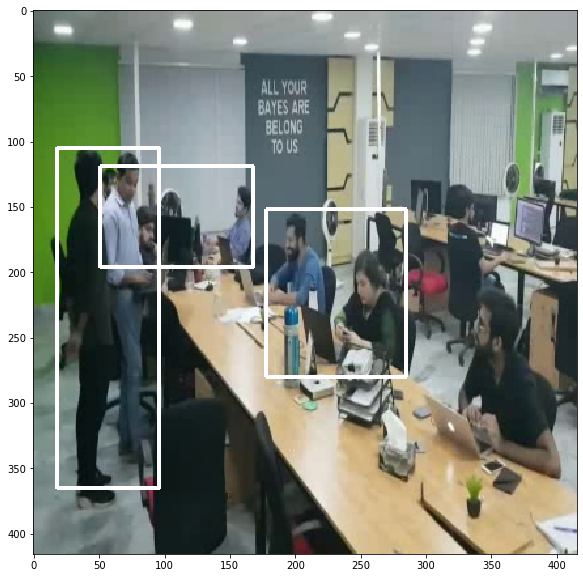

In [8]:
crowd=cluster_crowd(features[names=='person'],boxes[names=='person'],2,eps=0.9)
visualize(D.data[1].copy(),crowd)

In [ ]:
for c,i in enumerate(np.linspace(0.5,2,100)):
    print (c,i)
    img = copy.deepcopy(image)
    print (features)
    cluster_crowd(img,features,boxes_,thickness,ImageDraw.Draw(img),self.colors,2,eps=i,name='./results/'+str(c)+'.jpg')

In [ ]:
images=[]
        for i in range(100):
             images.append(cv2.imread('results/'+str(i)+ '.jpg'))
        return np.array(images),features

In [7]:
for i,c in reversed(list(enumerate(['a','b','c']))):
    print (bool(i),c)

True c
True b
False a


In [14]:
import numpy as np
a=np.arange(3).astype(str)
np.core.defchararray.add(a, '.txt')

array(['0.txt', '1.txt', '2.txt'], dtype='<U25')

In [26]:
import pandas as pd

(225, 225, 255)